In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("heart.csv")

# Show the first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
# Basic info
print("Shape of the dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check class balance
print("\nClass distribution (target variable):")
print(df['target'].value_counts())


Shape of the dataset: (1025, 14)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Summary statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.

In [3]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (820, 13)
X_test shape: (205, 13)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Accuracy score
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)


Decision Tree Accuracy: 0.9853658536585366


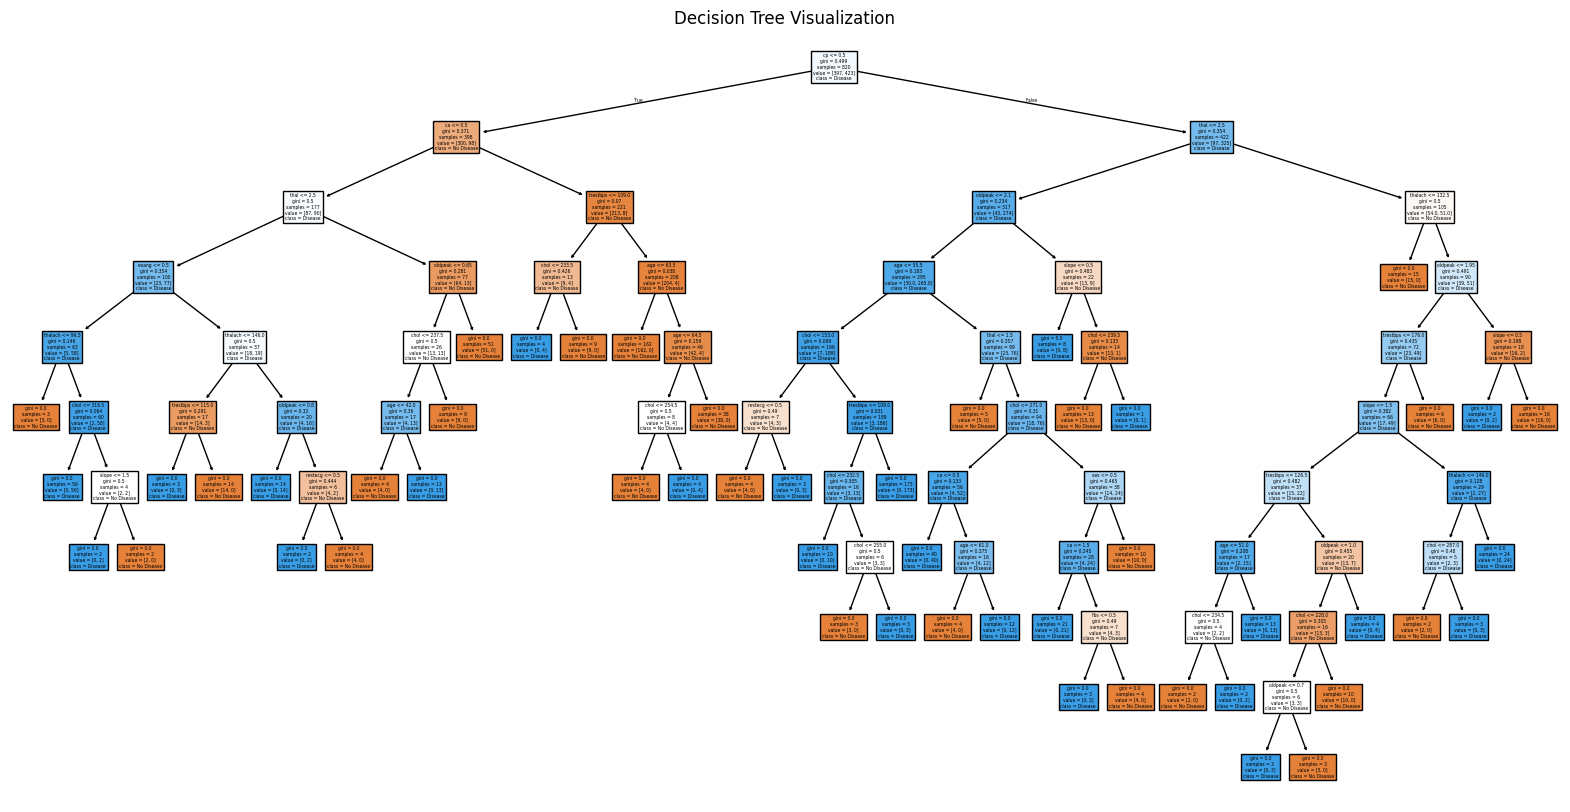

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Visualization")
plt.show()


Shallow Decision Tree Accuracy (max_depth=3): 0.7804878048780488


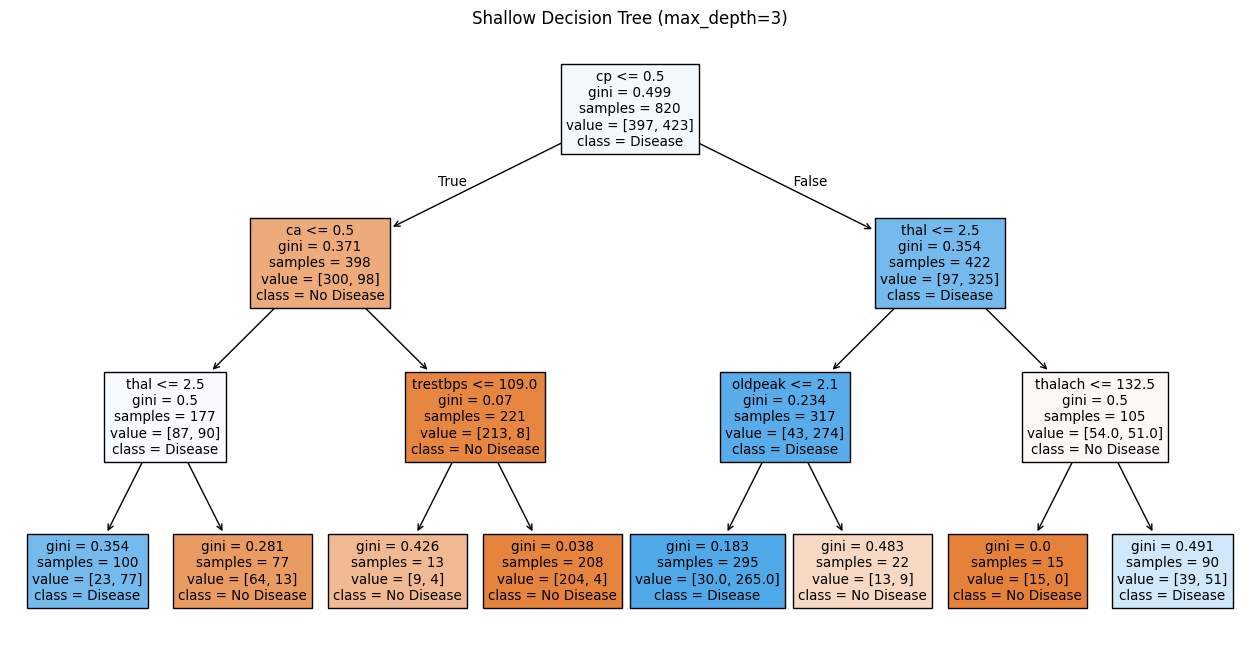

In [6]:
# Train a shallow decision tree to reduce overfitting
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

# Predict and check accuracy
y_pred_shallow = shallow_tree.predict(X_test)
acc_shallow = accuracy_score(y_test, y_pred_shallow)

print("Shallow Decision Tree Accuracy (max_depth=3):", acc_shallow)

# Visualize the shallow tree
plt.figure(figsize=(16, 8))
plot_tree(shallow_tree, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Shallow Decision Tree (max_depth=3)")
plt.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.9853658536585366


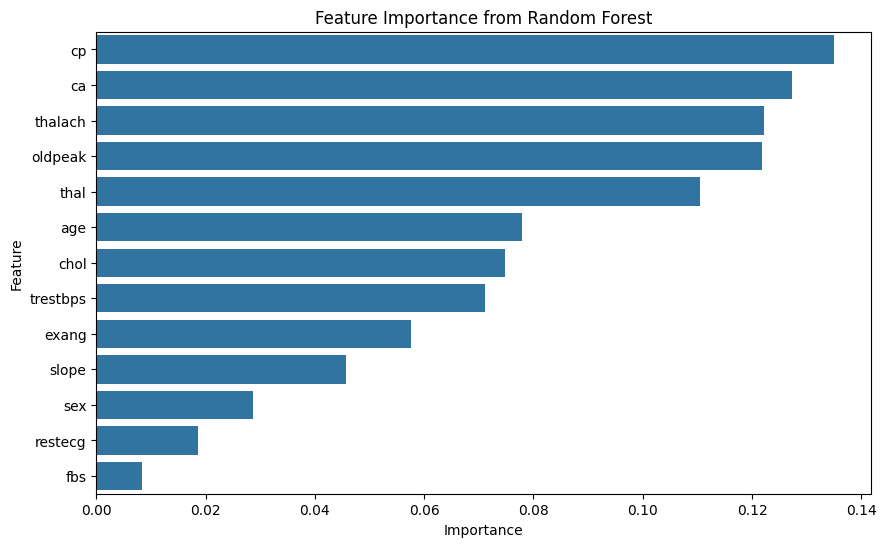

In [8]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance from Random Forest")
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score

# Cross-validation on Decision Tree
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
print("Decision Tree CV Accuracy Scores:", cv_scores_dt)
print("Mean CV Accuracy (Decision Tree):", np.mean(cv_scores_dt))

# Cross-validation on Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("\nRandom Forest CV Accuracy Scores:", cv_scores_rf)
print("Mean CV Accuracy (Random Forest):", np.mean(cv_scores_rf))


Decision Tree CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy (Decision Tree): 1.0

Random Forest CV Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy (Random Forest): 0.9970731707317073
